### UNIT12 지하철 시간대별 데이터 시각화하기

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=3, encoding='cp949')
df.shape

(598, 53)

In [86]:
df.head() # 헤더가 2줄이라서 첫데이터가 문제가 생김

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2019-05,1호선,150.0,서울역,"1,148",21,"11,958","10,579","15,684","61,286",...,"22,083","4,127","7,762",3,548,0,0,0,0,2019-06-03 10:56:25
2,2019-05,1호선,151.0,시청,89,5,"2,843","4,674","4,169","24,963",...,"4,767",931,"1,426",1,25,0,0,0,0,2019-06-03 10:56:25
3,2019-05,1호선,152.0,종각,116,3,"4,576","5,233","4,780","33,366",...,"5,882","3,973","1,565",1,1,0,0,0,0,2019-06-03 10:56:25
4,2019-05,1호선,153.0,종로3가,216,16,"5,505","3,036","4,790","16,235",...,"6,715","3,375","2,753",1,37,0,1,0,0,2019-06-03 10:56:25


In [87]:
df0 = df.drop(0).dropna() # index가 0인 행을 삭제한다. 0이라는 인덱스로는 찾을 수 없다.
df0 = df0.replace(',', '', regex=True)
df0.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
1,2019-05,1호선,150.0,서울역,1148,21,11958,10579,15684,61286,...,22083,4127,7762,3,548,0,0,0,0,2019-06-03 10:56:25
2,2019-05,1호선,151.0,시청,89,5,2843,4674,4169,24963,...,4767,931,1426,1,25,0,0,0,0,2019-06-03 10:56:25
3,2019-05,1호선,152.0,종각,116,3,4576,5233,4780,33366,...,5882,3973,1565,1,1,0,0,0,0,2019-06-03 10:56:25
4,2019-05,1호선,153.0,종로3가,216,16,5505,3036,4790,16235,...,6715,3375,2753,1,37,0,1,0,0,2019-06-03 10:56:25
5,2019-05,1호선,154.0,종로5가,51,3,2245,4205,3415,19150,...,3661,810,1200,0,6,0,0,0,0,2019-06-03 10:56:25


In [88]:
arr = np.array(df0)
arr[0]

array(['2019-05', '1호선', 150.0, '서울역', '1148', '21', '11958', '10579',
       '15684', '61286', '44585', '115354', '89357', '238583', '68146',
       '171350', '73525', '94790', '92022', '85227', '101383', '89704',
       '102975', '93903', '87681', '89304', '115315', '91208', '123612',
       '95981', '167329', '105879', '253795', '113369', '144348', '84947',
       '103166', '63630', '101273', '54836', '77000', '41500', '37939',
       '22083', '4127', '7762', '3', '548', '0', '0', '0', '0',
       '2019-06-03 10:56:25'], dtype=object)

출근 시간대에 사람들이 가장 많이 타고 내리는 역은 어딜까?
- 출근 시간대는 언제인가? 새벽 ~ 오전 9시
- 상위 10개 역
- 타는 역 / 내리는 역

In [105]:
출근시간시작위치 = 4
출근시간끝위치 = 13
역이름 = arr[:, 3]
출근시간승차인원 = arr[:, 출근시간시작위치:출근시간끝위치:2].astype(np.int)
출근시간하차인원 = arr[:, (출근시간시작위치+1):(출근시간끝위치+1):2].astype(np.int)
출근시간승차인원합 = 출근시간승차인원.sum(1)
출근시간하차인원합 = 출근시간하차인원.sum(1)

In [106]:
grade = 10

승차기준값 = np.sort(출근시간승차인원합)[-grade]
승차mask = 출근시간승차인원합 >= threshold
역이름[승차mask], 출근시간승차인원합[승차mask]

(array(['잠실(송파구청)', '서울대입구(관악구청)', '신림', '구로디지털단지', '신도림', '연신내', '쌍문',
        '수유(강북구청)', '화곡', '까치산'], dtype=object),
 array([412219, 454340, 759642, 490300, 444523, 454963, 412919, 382801,
        389612, 413462]))

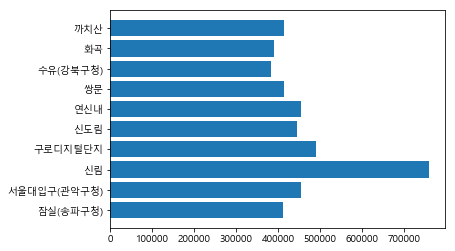

In [107]:
plt.rc('font', family='Malgun Gothic')
plt.barh(역이름[승차mask], 출근시간승차인원합[승차mask])
plt.show()

In [108]:
하차기준값 = np.sort(출근시간하차인원합)[-grade]
하차mask = 출근시간하차인원합 >= threshold
역이름[하차mask], 출근시간하차인원합[하차mask]

(array(['서울역', '종각', '을지로입구', '삼성(무역센터)', '선릉', '역삼', '강남', '구로디지털단지',
        '양재(서초구청)', '여의도', '광화문(세종문화회관)', '가산디지털단지'], dtype=object),
 array([425823, 442470, 522850, 565573, 490141, 561074, 634417, 397532,
        444935, 398099, 449314, 560341]))

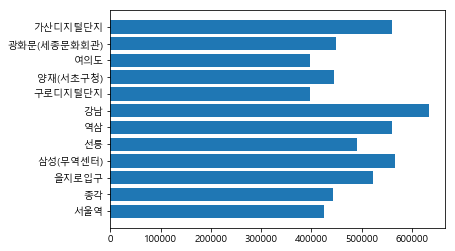

In [109]:
plt.rc('font', family='Malgun Gothic')
plt.barh(역이름[하차mask], 출근시간하차인원합[하차mask])
plt.show()

밤 11시에 사람들이 가장 많이 타는 역은 어디일까?

In [110]:
밤11시승차 = arr[:,-11].astype(np.int)
idx = 밤11시승차.argmax()
arr[idx, 1:4:2], 밤11시승차[idx]

(array(['2호선', '홍대입구'], dtype=object), 151504)

In [111]:
밤11기준값 = np.sort(밤11시승차)[-grade]
승차mask11 = 밤11시승차 >= 밤11기준값
역이름[승차mask11], 밤11시승차[승차mask11]

(array(['종각', '건대입구', '잠실(송파구청)', '강남', '사당', '합정', '홍대입구', '신촌', '혜화',
        '명동'], dtype=object),
 array([ 48067,  78429,  48786, 128937,  50264,  42696, 151504,  74678,
         55240,  43998]))

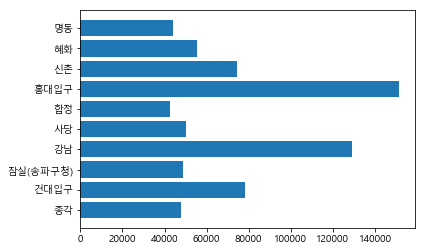

In [112]:
plt.rc('font', family='Malgun Gothic')
plt.barh(역이름[승차mask11], 밤11시승차[승차mask11])
plt.show()